In [ ]:
# Importing all necessary libraries
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
 
img_width, img_height = 256, 1024

In [ ]:

train_data_dir = '/content/drive/MyDrive/traffic-dataset/traffic-dataset/train'
validation_data_dir = '/content/drive/MyDrive/traffic-dataset/traffic-dataset/validation'
test_data_dir = '/content/drive/MyDrive/traffic-dataset/traffic-dataset/test'

nb_train_samples =666
nb_validation_samples = 50
epochs = 25
batch_size = 16

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Model 1: Printing class label using sigmoid activation and last layer with 1 neuron.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow
import datetime



log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


history=model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[tensorboard_callback])

Found 666 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Epoch 1/25
41/41 [==============================] - 287s 7s/step - loss: 2.7893 - accuracy: 0.6815 - val_loss: 1.1428 - val_accuracy: 0.5625
Epoch 2/25
41/41 [==============================] - 148s 4s/step - loss: 0.5531 - accuracy: 0.7477 - val_loss: 0.3648 - val_accuracy: 0.8750
Epoch 3/25
41/41 [==============================] - 148s 4s/step - loss: 0.5159 - accuracy: 0.7862 - val_loss: 0.3360 - val_accuracy: 0.8542
Epoch 4/25
41/41 [==============================] - 146s 4s/step - loss: 0.5144 - accuracy: 0.7831 - val_loss: 0.3409 - val_accuracy: 0.8542
Epoch 5/25
41/41 [==============================] - 144s 3s/step - loss: 0.4631 - accuracy: 0.8108 - val_loss: 0.2962 - val_accuracy: 0.8750
Epoch 6/25
41/41 [==============================] - 144s 3s/step - loss: 0.4681 - accuracy: 0.7969 - val_loss: 0.5094 - val_accuracy: 0.6875
Epoch 7/25
41/41 [==============================] - 144s 3s/step - loss: 

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 255, 1023, 32)     416       
                                                                 
 activation_10 (Activation)  (None, 255, 1023, 32)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 511, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 510, 32)      4128      
                                                                 
 activation_11 (Activation)  (None, 126, 510, 32)      0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 255, 32)      0         
 2D)                                                  

In [ ]:
%tensorboard --logdir logs/fit

<IPython.core.display.Javascript object>

In [ ]:
history.history

{'accuracy': [0.681538462638855,
  0.7476922869682312,
  0.7861538529396057,
  0.7830769419670105,
  0.810769259929657,
  0.7969231009483337,
  0.810769259929657,
  0.8246153593063354,
  0.8261538743972778,
  0.8169230818748474,
  0.8261538743972778,
  0.8169230818748474,
  0.8369230628013611,
  0.8399999737739563,
  0.8307692408561707,
  0.8199999928474426,
  0.8246153593063354,
  0.8553845882415771,
  0.8507692217826843,
  0.8646153807640076,
  0.8523076772689819,
  0.8507692217826843,
  0.8461538553237915,
  0.8553845882415771,
  0.8615384697914124],
 'loss': [2.789276361465454,
  0.5531468987464905,
  0.5158843398094177,
  0.514446496963501,
  0.46311208605766296,
  0.4681459367275238,
  0.5138962268829346,
  0.46825647354125977,
  0.46932485699653625,
  0.5161124467849731,
  0.4359683096408844,
  0.4226972460746765,
  0.41118690371513367,
  0.4308698773384094,
  0.43167516589164734,
  0.4324813187122345,
  0.473763108253479,
  0.40672463178634644,
  0.5870655179023743,
  0.4241674

In [ ]:
train_generator.class_indices

{'Malware': 0, 'Normal': 1}

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model

 
image = load_img('/content/drive/MyDrive/traffic-dataset/traffic-dataset/test/Malware/2017-02-09-Hancitor-Pony-malspam-traffic.png', target_size=(256, 1024))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,1024,3)
preds=model.predict(img)




In [ ]:
preds[0][0]

0.015496641

In [ ]:
print("Malware:0, Normal:1   -> ANS:", 0 if preds[0][0]<0.5 else 1 )

Malware:0, Normal:1   -> ANS: 0


In [ ]:

image = load_img('/content/drive/MyDrive/traffic-dataset/traffic-dataset/test/Normal/aaa.png', target_size=(256, 1024))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,1024,3)
preds=model.predict(img)


In [ ]:
preds

array([[0.43971652]], dtype=float32)

In [ ]:
print("Malware:0, Normal:1   -> ANS:", 0 if preds[0][0]<0.5 else 1)

Malware:0, Normal:1   -> ANS: 0


### Model 2:  Printing probabilities/confidence using softmax activation and last layer with 2 neurons

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (2, 2), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
 
model2.add(Conv2D(32, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
 
model2.add(Conv2D(64, (2, 2)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
 
model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2))
model2.add(Activation('softmax'))

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
log_dir = "logs2/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [ ]:
history2 = model2.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
      callbacks=[tensorboard_callback])

Epoch 1/25
41/41 [==============================] - 154s 4s/step - loss: 2.2695 - accuracy: 0.6662 - val_loss: 2.0554 - val_accuracy: 0.6250
Epoch 2/25
41/41 [==============================] - 150s 4s/step - loss: 0.6587 - accuracy: 0.7369 - val_loss: 0.5470 - val_accuracy: 0.7083
Epoch 3/25
41/41 [==============================] - 151s 4s/step - loss: 0.6289 - accuracy: 0.7662 - val_loss: 0.3711 - val_accuracy: 0.7708
Epoch 4/25
41/41 [==============================] - 153s 4s/step - loss: 0.5353 - accuracy: 0.7692 - val_loss: 0.5422 - val_accuracy: 0.6458
Epoch 5/25
41/41 [==============================] - 149s 4s/step - loss: 0.5248 - accuracy: 0.8031 - val_loss: 0.2235 - val_accuracy: 0.9167
Epoch 6/25
41/41 [==============================] - 149s 4s/step - loss: 0.6045 - accuracy: 0.8154 - val_loss: 0.4333 - val_accuracy: 0.7500
Epoch 7/25
41/41 [==============================] - 150s 4s/step - loss: 0.4478 - accuracy: 0.8277 - val_loss: 0.3136 - val_accuracy: 0.8333
Epoch 8/25
41

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 255, 1023, 32)     416       
                                                                 
 activation_15 (Activation)  (None, 255, 1023, 32)     0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 511, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 126, 510, 32)      4128      
                                                                 
 activation_16 (Activation)  (None, 126, 510, 32)      0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 63, 255, 32)      0         
 g2D)                                                 

In [ ]:
%tensorboard --logdir logs2/fit

Reusing TensorBoard on port 6006 (pid 122), started 2:33:09 ago. (Use '!kill 122' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
history2.history

{'accuracy': [0.6661538481712341,
  0.736923098564148,
  0.766153872013092,
  0.7692307829856873,
  0.8030769228935242,
  0.8153846263885498,
  0.8276923298835754,
  0.8138461709022522,
  0.8353846073150635,
  0.8199999928474426,
  0.8369230628013611,
  0.8246153593063354,
  0.8446153998374939,
  0.8523076772689819,
  0.8492307662963867,
  0.8369230628013611,
  0.8415384888648987,
  0.8430769443511963,
  0.8369230628013611,
  0.8492307662963867,
  0.8430769443511963,
  0.8646153807640076,
  0.8600000143051147,
  0.8569231033325195,
  0.8507692217826843],
 'loss': [2.2694833278656006,
  0.6586989164352417,
  0.6288999915122986,
  0.5352991223335266,
  0.5247567296028137,
  0.6045235395431519,
  0.4478282332420349,
  0.45196759700775146,
  0.4402863383293152,
  0.5079808235168457,
  0.43396949768066406,
  0.4406389892101288,
  0.42754751443862915,
  0.43551063537597656,
  0.417341023683548,
  0.48182108998298645,
  0.44000229239463806,
  0.38637980818748474,
  0.41421249508857727,
  0.40

In [ ]:
print(train_generator.class_indices)
print(train_generator.classes)


{'Malware': 0, 'Normal': 1}
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:

image = load_img('/content/drive/MyDrive/traffic-dataset/traffic-dataset/test/Malware/2017-02-09-Hancitor-Pony-malspam-traffic.png', target_size=(256, 1024))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,1024,3)
preds=model2.predict(img)


In [ ]:
preds

array([[0.9076093 , 0.09239075]], dtype=float32)

In [ ]:
print("Model believes the example is " + str(preds[0][0]*100) + " %  Malicious")
print("Model believes the example is " + str(preds[0][1]*100) + " %  Normal")

Model believes the example is 90.76092839241028 %  Malicious
Model believes the example is 9.23907458782196 %  Normal


In [ ]:
image = load_img('/content/drive/MyDrive/traffic-dataset/traffic-dataset/test/Normal/aaa.png', target_size=(256, 1024))
img = np.array(image)
img = img / 255.0
img = img.reshape(1,256,1024,3)
preds=model2.predict(img)

In [ ]:
preds

array([[0.34220487, 0.65779513]], dtype=float32)

In [ ]:
print("Model believes the example is " + str(preds[0][0]*100) + " %  Malicious")
print("Model believes the example is " + str(preds[0][1]*100) + " %  Normal")

Model believes the example is 34.220486879348755 %  Malicious
Model believes the example is 65.77951312065125 %  Normal


### Print Confusion Matrices for Both Models




In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

preds = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(preds, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['Malicious', 'Normal']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
[[20  0]
 [30  0]]
Classification Report
              precision    recall  f1-score   support

   Malicious       0.40      1.00      0.57        20
      Normal       0.00      0.00      0.00        30

    accuracy                           0.40        50
   macro avg       0.20      0.50      0.29        50
weighted avg       0.16      0.40      0.23        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Dot Outputs for Both Models

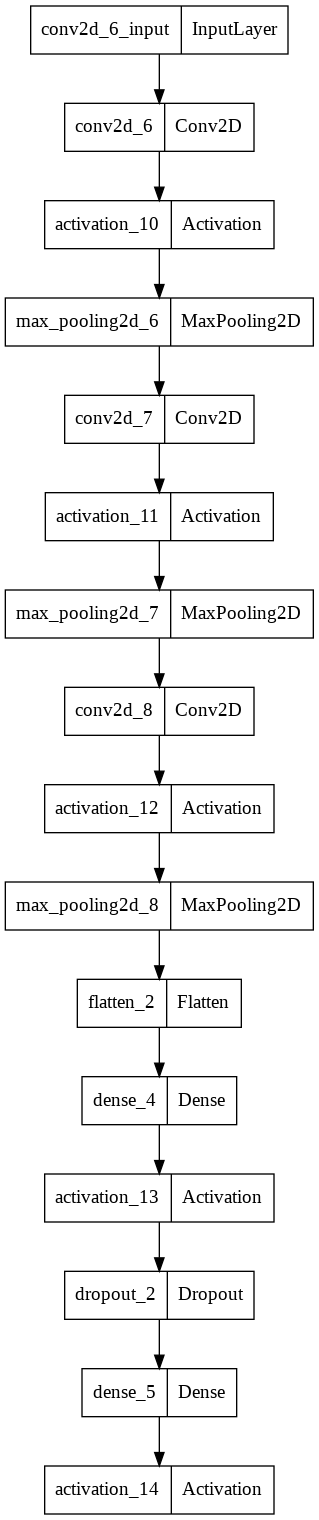

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

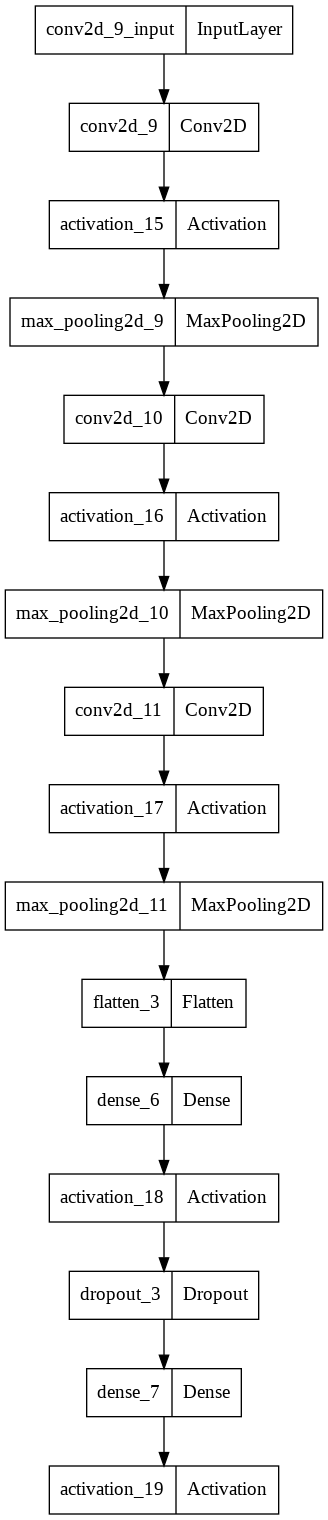

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2.png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')